<a href="https://colab.research.google.com/github/dadakhalander/ml/blob/main/ml_ass_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRARIES

In [1]:
# Import the necessary module
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Data Preparation & Cleaning

###Load & Inspect Data

In [2]:
df = pd.read_csv('/content/E_Commerce_Data_Set_4034.csv')

In [3]:
df.head()

,Genre,Age,Annual_Income (£K),Spending_Score
0,Male,24.0,62.0,13.0
1,Male,52.0,59.0,35.0
2,Female,42.0,31.0,12.0
3,Female,20.0,92.0,41.0
4,Female,30.0,52.0,40.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Genre               800 non-null    object 
 1   Age                 775 non-null    float64
 2   Annual_Income (£K)  781 non-null    float64
 3   Spending_Score      785 non-null    float64
dtypes: float64(3), object(1)
memory usage: 25.1+ KB


In [5]:
# checking null values
df.isnull().sum()

,0
Genre,0
Age,25
Annual_Income (£K),19
Spending_Score,15


In [6]:
df.duplicated().sum()

np.int64(252)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(548, 4)

In [9]:
# Summary statistics for numerical columns
df[['Age', 'Annual_Income (£K)', 'Spending_Score']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,528.0,42.429924,14.212097,18.0,29.75,43.0,55.0,68.0
Annual_Income (£K),534.0,69.086142,29.622327,17.0,46.00,67.0,94.0,141.0
Spending_Score,538.0,30.773234,18.054250,1.0,14.00,31.0,46.0,67.0


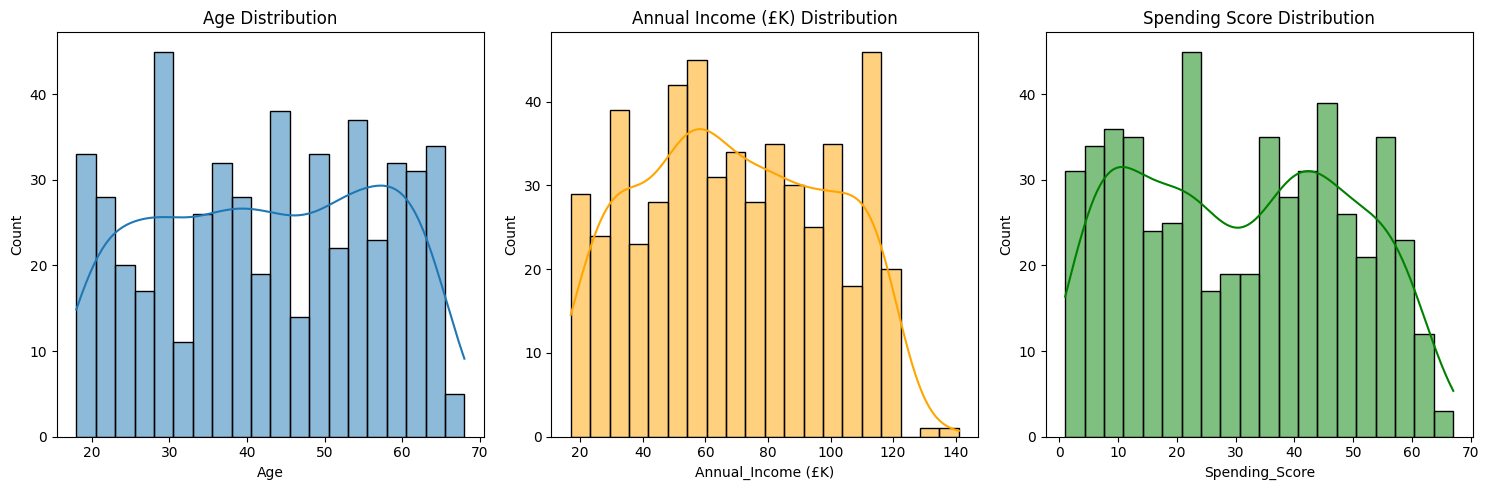

In [10]:
# Visualizing distributions
plt.figure(figsize=(15, 5))

# Age Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')

# Annual Income Distribution
plt.subplot(1, 3, 2)
sns.histplot(df['Annual_Income (£K)'].dropna(), bins=20, kde=True, color='orange')
plt.title('Annual Income (£K) Distribution')

# Spending Score Distribution
plt.subplot(1, 3, 3)
sns.histplot(df['Spending_Score'].dropna(), bins=20, kde=True, color='green')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

###  Handle Missing Values

In [11]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)  # Choose 5 closest neighbors
df[['Age', 'Annual_Income (£K)', 'Spending_Score']] = knn_imputer.fit_transform(df[['Age', 'Annual_Income (£K)', 'Spending_Score']])


In [12]:
df.isnull().sum()

,0
Genre,0
Age,0
Annual_Income (£K),0
Spending_Score,0


### outliers and Z- score

In [13]:
# Identify outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


outliers = detect_outliers_iqr(df, 'Annual_Income (£K)')

# Now you can count the outliers
outliers.count()

,0
Genre,0
Age,0
Annual_Income (£K),0
Spending_Score,0


### Convert Categorical Variables

In [14]:
# Assuming 'Genre' is the column name for male/female
df = pd.get_dummies(df, columns=['Genre'], prefix=['Gender'])
df.head()

,Age,Annual_Income (£K),Spending_Score,Gender_Female,Gender_Male
0,24.0,62.0,13.0,False,True
1,52.0,59.0,35.0,False,True
2,42.0,31.0,12.0,True,False
3,20.0,92.0,41.0,True,False
4,30.0,52.0,40.0,True,False


In [15]:
df0 = df.copy()  # Create a copy of the original DataFrame


In [16]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 0 to 799
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 548 non-null    float64
 1   Annual_Income (£K)  548 non-null    float64
 2   Spending_Score      548 non-null    float64
 3   Gender_Female       548 non-null    bool   
 4   Gender_Male         548 non-null    bool   
dtypes: bool(2), float64(3)
memory usage: 18.2 KB


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 0 to 799
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 548 non-null    float64
 1   Annual_Income (£K)  548 non-null    float64
 2   Spending_Score      548 non-null    float64
 3   Gender_Female       548 non-null    bool   
 4   Gender_Male         548 non-null    bool   
dtypes: bool(2), float64(3)
memory usage: 18.2 KB


### Scale Data

In [18]:
# Select numerical columns for scaling
num_cols = ['Age', 'Annual_Income (£K)', 'Spending_Score']

In [19]:
num_cols

['Age', 'Annual_Income (£K)', 'Spending_Score']

In [20]:
# Choose a StandardScaler or MinMaxScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# now dataset is  transformed
df.head()

,Age,Annual_Income (£K),Spending_Score,Gender_Female,Gender_Male
0,-1.320898,-0.240995,-0.988880,False,True
1,0.684590,-0.343472,0.239375,False,True
2,-0.031656,-1.299924,-1.044709,True,False
3,-1.607396,0.783774,0.574354,True,False
4,-0.891151,-0.582585,0.518524,True,False


### OLS TEST

In [21]:
# Define dependent variable (Y) and independent variables (X)
Y1 = df["Spending_Score"]
X1 = df[["Age", "Annual_Income (£K)", "Gender_Male"]]

In [22]:
# Add a constant for the intercept
X1 = sm.add_constant(X1)

In [23]:
# Ensure all columns in X1 are numeric
X1 = X1.astype(float)

In [24]:
# Fit OLS model
model = sm.OLS(Y1, X1).fit()

In [25]:
# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Spending_Score   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.114
Date:                Fri, 28 Mar 2025   Prob (F-statistic):             0.0259
Time:                        11:09:46   Log-Likelihood:                -772.91
No. Observations:                 548   AIC:                             1554.
Df Residuals:                     544   BIC:                             1571.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0346      0

In [26]:
# Calculate VIF(Variance Inflation Factor) for each variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X1.columns
vif_data["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]

print(vif_data)

              Feature       VIF
0               const  1.786832
1                 Age  1.006594
2  Annual_Income (£K)  1.006872
3         Gender_Male  1.002314


# Exploratory Data Analysis (EDA)

### Visualize Feature Distributions

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 0 to 799
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 548 non-null    float64
 1   Annual_Income (£K)  548 non-null    float64
 2   Spending_Score      548 non-null    float64
 3   Gender_Female       548 non-null    bool   
 4   Gender_Male         548 non-null    bool   
dtypes: bool(2), float64(3)
memory usage: 18.2 KB


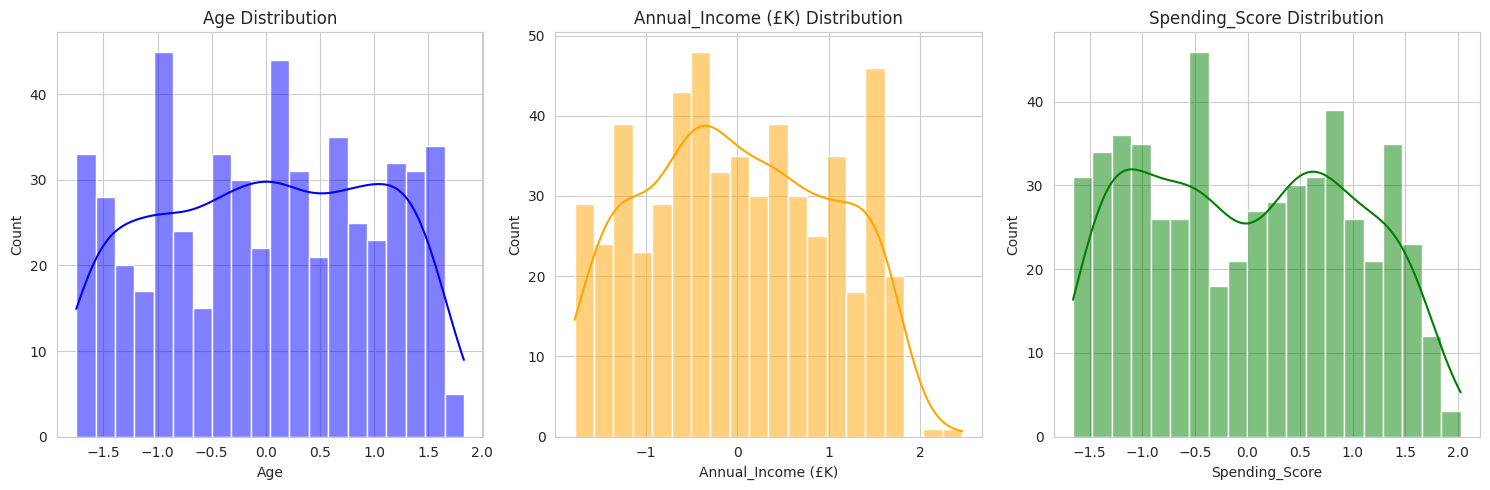

In [28]:
# Set style for plots
sns.set_style("whitegrid")
# Histograms & KDE Plots
plt.figure(figsize=(15, 5))

for i, col in enumerate(df[['Age', 'Annual_Income (£K)', 'Spending_Score']]):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], bins=20, kde=True, color=['blue', 'orange', 'green'][i])
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

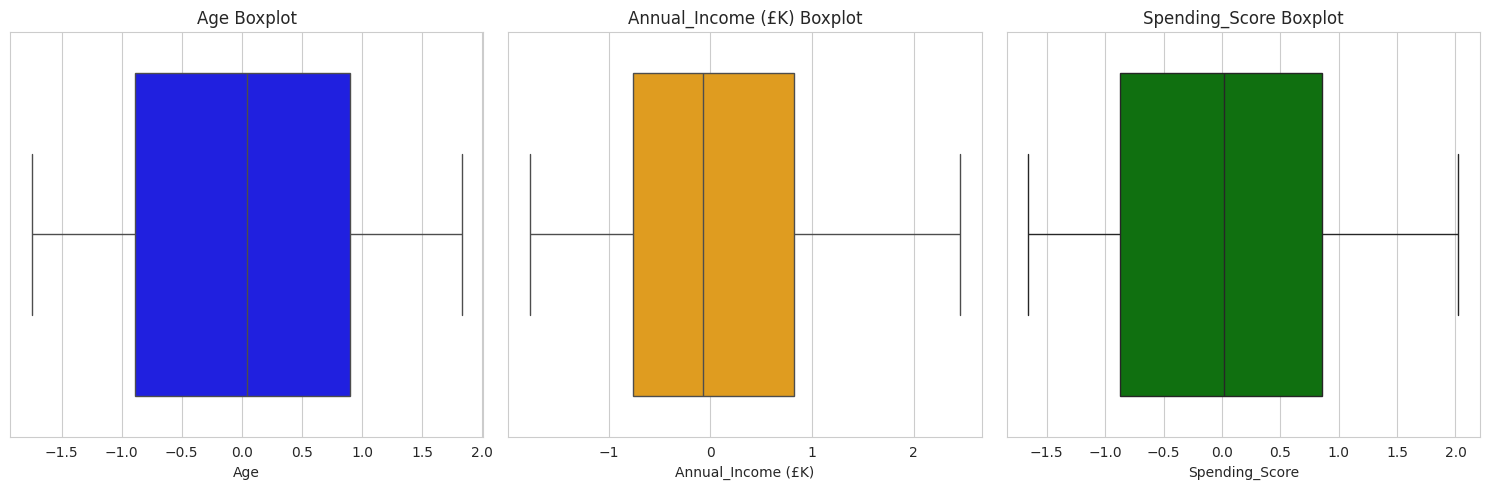

In [29]:
# Boxplots for Outliers
plt.figure(figsize=(15, 5))

for i, col in enumerate(df[['Age', 'Annual_Income (£K)', 'Spending_Score']]):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[col], color=['blue', 'orange', 'green'][i])
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

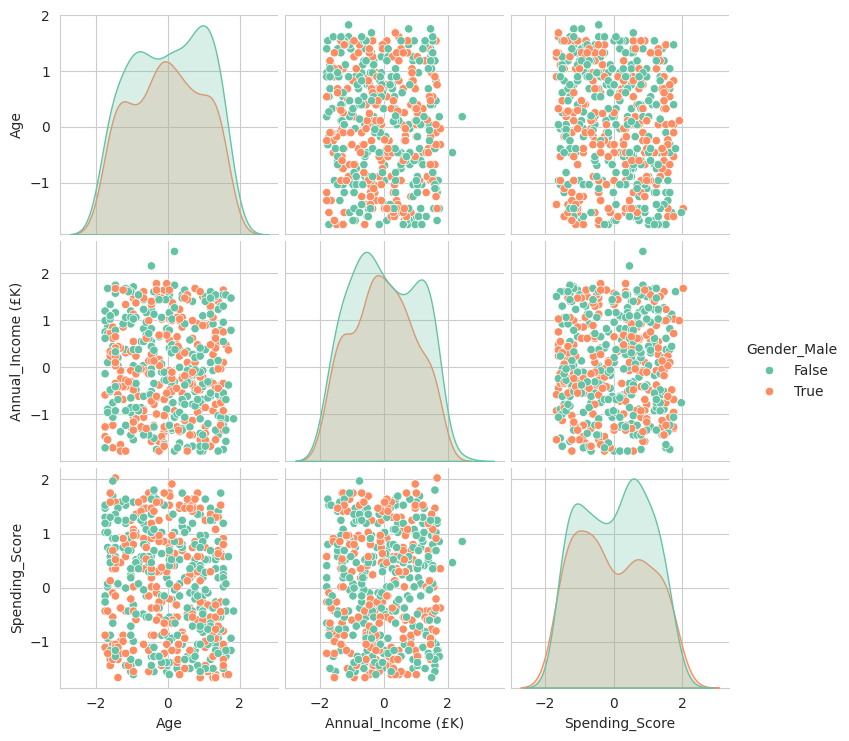

In [30]:
#  Pairplot to Identify Relationships
sns.pairplot(df[['Age', 'Annual_Income (£K)', 'Spending_Score', 'Gender_Male']], hue='Gender_Male', palette='Set2')
plt.show()

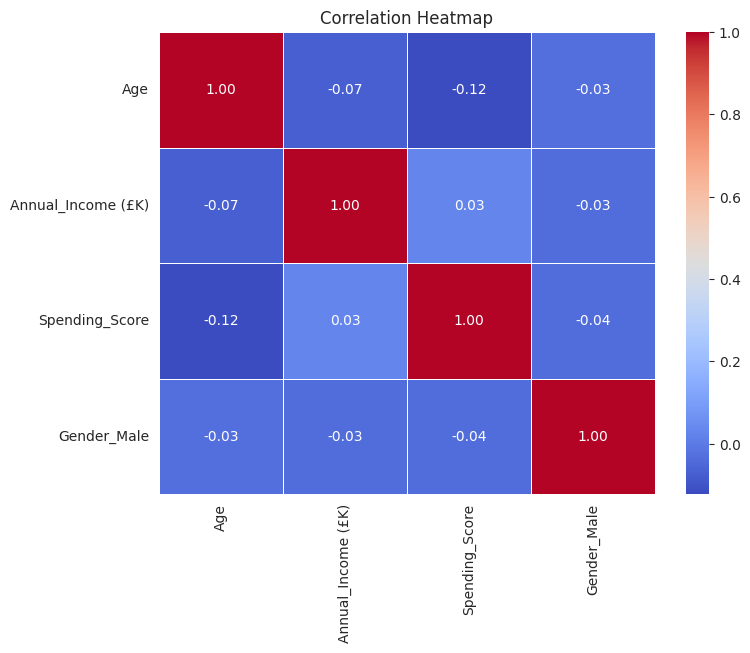

In [31]:
#  Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = df[['Age', 'Annual_Income (£K)', 'Spending_Score','Gender_Male']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Dimensionality Reduction (Optional)

In [32]:
# Select numerical columns for dimensionality reduction
features = ['Age', 'Annual_Income (£K)', 'Spending_Score']
X = df[features]

In [33]:
# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X)

In [34]:
X

,Age,Annual_Income (£K),Spending_Score
0,-1.320898,-0.240995,-0.988880
1,0.684590,-0.343472,0.239375
2,-0.031656,-1.299924,-1.044709
3,-1.607396,0.783774,0.574354
4,-0.891151,-0.582585,0.518524
...,...,...,...
795,0.197543,0.373866,-0.653901
796,-1.034400,-0.650903,0.183545
797,0.326467,1.022887,-1.603007
798,-0.389779,0.134753,1.411800


In [35]:
df_pca

array([[-0.1857495 ,  0.1470828 ],
       [ 0.4628267 , -0.34336869],
       [ 1.16909962, -0.60195183],
       ...,
       [ 0.74602501,  1.71304929],
       [-1.17165636, -0.62791464],
       [ 0.14421657, -1.90356556]])

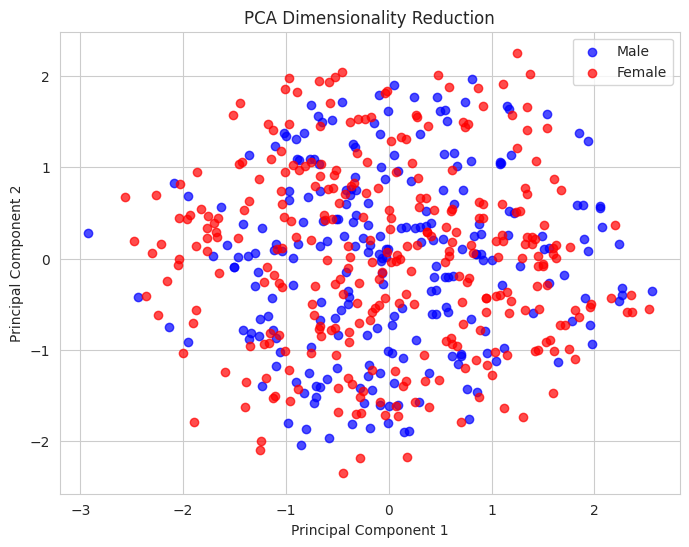

In [36]:
# Scatter plot of PCA-reduced data
plt.figure(figsize=(8, 6))

# Separate data points for male and female
male_indices = df['Gender_Male'] == 1
female_indices = df['Gender_Male'] == 0

# Plot male and female data points with different colors and labels
plt.scatter(df_pca[male_indices, 0], df_pca[male_indices, 1],
            c='blue', alpha=0.7, label='Male')
plt.scatter(df_pca[female_indices, 0], df_pca[female_indices, 1],
            c='red', alpha=0.7, label='Female')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Dimensionality Reduction")
plt.grid(True)

# Add legend to the plot
plt.legend()

plt.show()

In [37]:
# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.38574296 0.71028724]


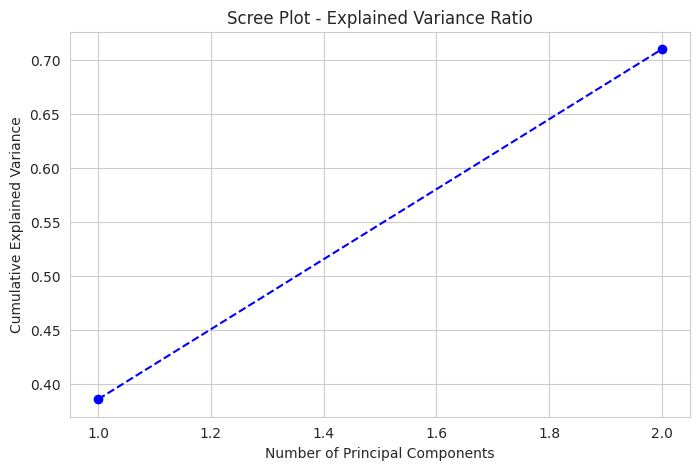

In [38]:
# Plot Scree Plot
plt.figure(figsize=(8, 5))
# Change len(features) to pca.n_components_ to match explained_variance shape
plt.plot(range(1, pca.n_components_ + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot - Explained Variance Ratio")
plt.grid(True)
plt.show()

## t-SNE

• Unlike PCA (which captures variance), t-SNE
is non-linear and focuses on preserving local relationships.

• Great for clustering visualization when data has complex structures.

In [39]:
X

,Age,Annual_Income (£K),Spending_Score
0,-1.320898,-0.240995,-0.988880
1,0.684590,-0.343472,0.239375
2,-0.031656,-1.299924,-1.044709
3,-1.607396,0.783774,0.574354
4,-0.891151,-0.582585,0.518524
...,...,...,...
795,0.197543,0.373866,-0.653901
796,-1.034400,-0.650903,0.183545
797,0.326467,1.022887,-1.603007
798,-0.389779,0.134753,1.411800


In [40]:
# Apply t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
df_tsne = tsne.fit_transform(X)

In [41]:
# Convert to DataFrame for plotting
df_tsne = pd.DataFrame(df_tsne, columns=["t-SNE Component 1", "t-SNE Component 2"])

In [42]:
df_tsne

,t-SNE Component 1,t-SNE Component 2
0,7.699387,13.777788
1,1.913331,-0.737840
2,10.431880,-12.573306
3,-22.350677,-1.818614
4,-6.277596,-12.526223
...,...,...
543,7.215080,7.037626
544,-4.160681,-12.005442
545,1.639659,23.292273
546,-13.539537,-7.306520


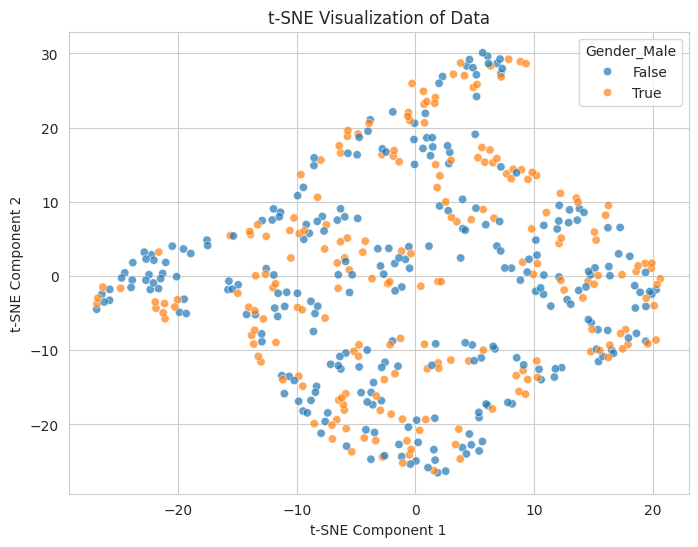

In [43]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_tsne["t-SNE Component 1"], y=df_tsne["t-SNE Component 2"],hue=df['Gender_Male'] ,alpha=0.7, color="blue")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Data")
plt.grid(True)
plt.show()

# Model Selection & Clustering Analysis


### K-Means Clustering

In [44]:
X

,Age,Annual_Income (£K),Spending_Score
0,-1.320898,-0.240995,-0.988880
1,0.684590,-0.343472,0.239375
2,-0.031656,-1.299924,-1.044709
3,-1.607396,0.783774,0.574354
4,-0.891151,-0.582585,0.518524
...,...,...,...
795,0.197543,0.373866,-0.653901
796,-1.034400,-0.650903,0.183545
797,0.326467,1.022887,-1.603007
798,-0.389779,0.134753,1.411800


In [45]:
#  Finding optimal K using the Elbow Method
inertia = []
sil_scores = []
K_range = range(2, 11)  # Trying K from 2 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, kmeans.labels_))

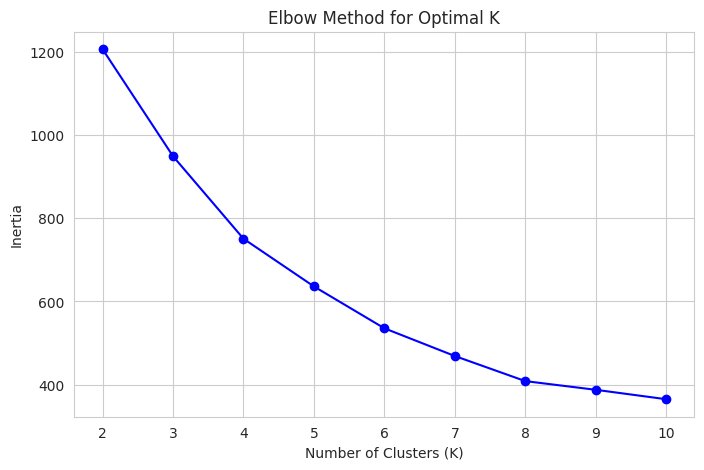

In [46]:
# Elbow Plot
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', color='b', label='Inertia')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

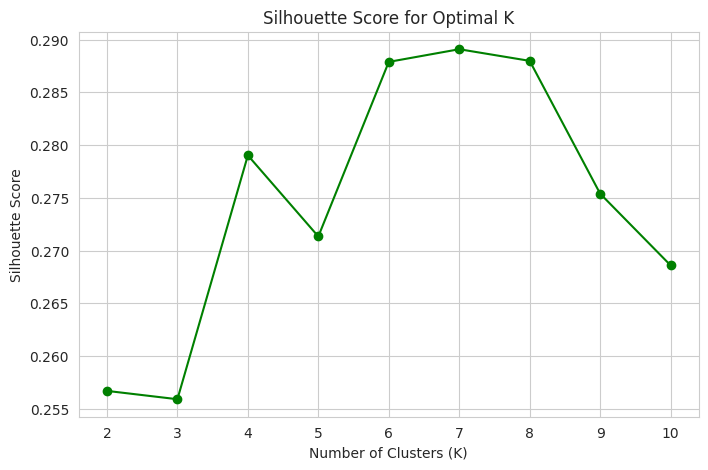

In [47]:
# Silhouette Score Plot
plt.figure(figsize=(8, 5))
plt.plot(K_range, sil_scores, marker='o', color='g', label='Silhouette Score')
plt.title("Silhouette Score for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

In [48]:
#  Apply K-Means with the optimal K (let's assume K=4 based on the plots)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster_k'] = kmeans.fit_predict(X)

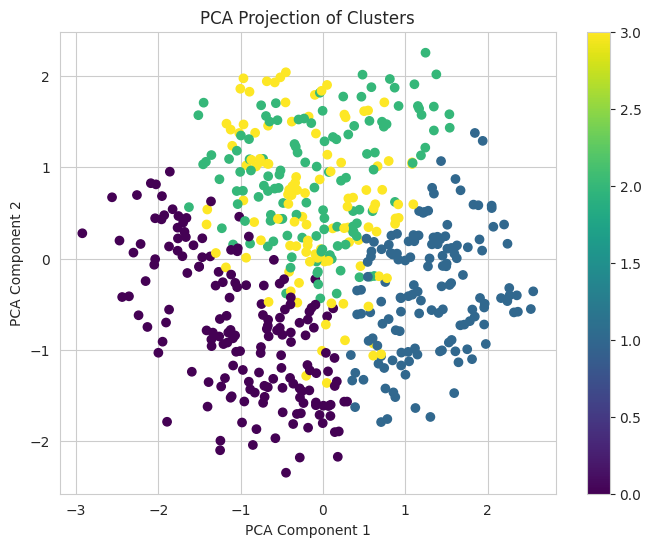

In [49]:
#  Visualize the clusters using PCA (2D projection)


plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster_k'], cmap='viridis')
plt.title("PCA Projection of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.show()

Cluster Centroids

In [50]:
# Check the centroids of the clusters
centroids = kmeans.cluster_centers_

# Since the data was standardized, you can inverse-transform the centroids to get them in the original scale
centroids_original = scaler.inverse_transform(centroids)

# Display the centroids

centroid_df = pd.DataFrame(centroids_original, columns=num_cols)
print("Cluster Centroids:")
print(centroid_df)

Cluster Centroids:
         Age  Annual_Income (£K)  Spending_Score
0  32.954491           62.379641       48.609581
1  54.560563           44.460563       20.491549
2  52.187302           98.865079       33.607937
3  30.368142           76.587611       13.877876


In [51]:
# Calculate the mean for each feature per cluster
cluster_means = df.groupby('Cluster_k').mean()
print("Cluster Means:")
cluster_means


Cluster Means:


,Age,Annual_Income (£K),Spending_Score,Gender_Female,Gender_Male
Cluster_k,,,,,
0,-0.679537,-0.228027,0.999195,0.586826,0.413174
1,0.867989,-0.840125,-0.570628,0.605634,0.394366
2,0.698005,1.018278,0.161657,0.563492,0.436508
3,-0.864783,0.257303,-0.939868,0.460177,0.539823


In [52]:
#  Evaluate the clustering with the silhouette score
sil_score = silhouette_score(X, df['Cluster_k'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.27902920888099003


In [53]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin Index
db_score = davies_bouldin_score(X, df['Cluster_k'])
print(f"Davies-Bouldin Index: {db_score}")


Davies-Bouldin Index: 1.112442651361807


In [54]:
df

,Age,Annual_Income (£K),Spending_Score,Gender_Female,Gender_Male,Cluster_k
0,-1.320898,-0.240995,-0.988880,False,True,3
1,0.684590,-0.343472,0.239375,False,True,1
2,-0.031656,-1.299924,-1.044709,True,False,1
3,-1.607396,0.783774,0.574354,True,False,0
4,-0.891151,-0.582585,0.518524,True,False,0
...,...,...,...,...,...,...
795,0.197543,0.373866,-0.653901,True,False,3
796,-1.034400,-0.650903,0.183545,True,False,0
797,0.326467,1.022887,-1.603007,False,True,3
798,-0.389779,0.134753,1.411800,False,True,0


In [55]:
df0

,Age,Annual_Income (£K),Spending_Score,Gender_Female,Gender_Male
0,24.0,62.0,13.0,False,True
1,52.0,59.0,35.0,False,True
2,42.0,31.0,12.0,True,False
3,20.0,92.0,41.0,True,False
4,30.0,52.0,40.0,True,False
...,...,...,...,...,...
795,45.2,80.0,19.0,True,False
796,28.0,50.0,34.0,True,False
797,47.0,99.0,2.0,False,True
798,37.0,73.0,56.0,False,True


In [56]:
df0 = df0.reset_index(drop=True)
df = df.reset_index(drop=True)


# Add the 'Age' column from 'df0' to 'df'
df['Age_original'] = df0['Age']
df.head()


,Age,Annual_Income (£K),Spending_Score,Gender_Female,Gender_Male,Cluster_k,Age_original
0,-1.320898,-0.240995,-0.988880,False,True,3,24.0
1,0.684590,-0.343472,0.239375,False,True,1,52.0
2,-0.031656,-1.299924,-1.044709,True,False,1,42.0
3,-1.607396,0.783774,0.574354,True,False,0,20.0
4,-0.891151,-0.582585,0.518524,True,False,0,30.0


In [57]:
df['Annual_Income (£K)_original'] = df0['Annual_Income (£K)']


In [58]:
df['Spending_Score_original'] = df0['Spending_Score']

In [59]:
df

,Age,Annual_Income (£K),Spending_Score,Gender_Female,Gender_Male,Cluster_k,Age_original,Annual_Income (£K)_original,Spending_Score_original
0,-1.320898,-0.240995,-0.988880,False,True,3,24.0,62.0,13.0
1,0.684590,-0.343472,0.239375,False,True,1,52.0,59.0,35.0
2,-0.031656,-1.299924,-1.044709,True,False,1,42.0,31.0,12.0
3,-1.607396,0.783774,0.574354,True,False,0,20.0,92.0,41.0
4,-0.891151,-0.582585,0.518524,True,False,0,30.0,52.0,40.0
...,...,...,...,...,...,...,...,...,...
543,0.197543,0.373866,-0.653901,True,False,3,45.2,80.0,19.0
544,-1.034400,-0.650903,0.183545,True,False,0,28.0,50.0,34.0
545,0.326467,1.022887,-1.603007,False,True,3,47.0,99.0,2.0
546,-0.389779,0.134753,1.411800,False,True,0,37.0,73.0,56.0


In [60]:


# Group data by cluster
grouped = df.groupby('Cluster_k')

# Iterate through each cluster
for cluster_label, cluster_data in grouped:
    print(f"Cluster {cluster_label}:")
    print(cluster_data) # Print or process each cluster individually
    # Example: Calculate and print the mean age for the cluster
    print(f"Mean Age in cluster {cluster_label}: {cluster_data['Age_original'].mean()}")
    print("-" * 20) # Separator between clusters


Cluster 0:
          Age  Annual_Income (£K)  Spending_Score  Gender_Female  Gender_Male  \
3   -1.607396            0.783774        0.574354           True        False   
4   -0.891151           -0.582585        0.518524           True        False   
7   -0.604652           -1.436560        0.797673           True        False   
9   -0.747902            0.544661        0.574354           True        False   
10  -0.533028           -1.299924        1.746779          False         True   
..        ...                 ...             ...            ...          ...   
537 -1.464147           -0.411790        0.909332           True        False   
542  0.111593           -0.104359        0.965162          False         True   
544 -1.034400           -0.650903        0.183545           True        False   
546 -0.389779            0.134753        1.411800          False         True   
547  0.612965           -1.436560        1.467630          False         True   

     Cluster_k  

### visulization k_means

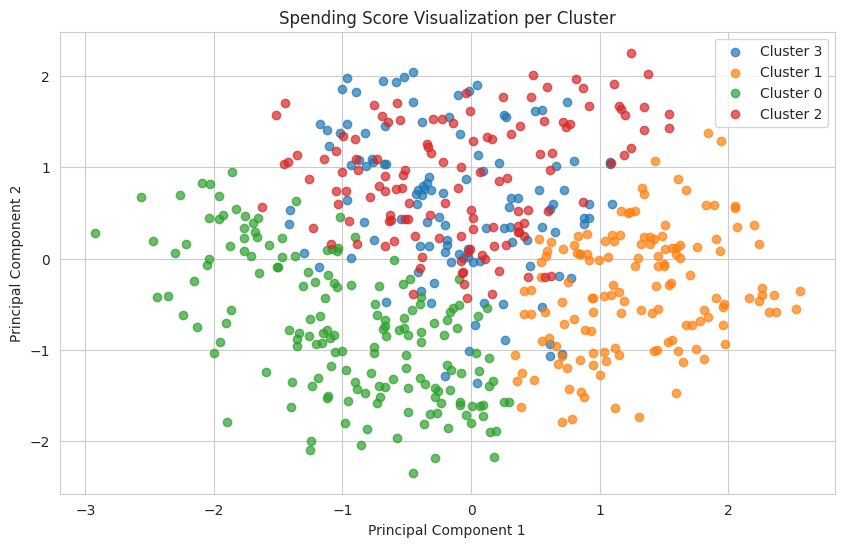

In [61]:
# prompt: visualise each cluster with spending score

import matplotlib.pyplot as plt

# Assuming 'df' and 'df_pca' are defined from the previous code

plt.figure(figsize=(10, 6))

for cluster_label in df['Cluster_k'].unique():
    cluster_data = df[df['Cluster_k'] == cluster_label]
    plt.scatter(df_pca[df['Cluster_k'] == cluster_label, 0],
                df_pca[df['Cluster_k'] == cluster_label, 1],
                label=f'Cluster {cluster_label}', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Spending Score Visualization per Cluster')
plt.legend()
plt.grid(True)
plt.show()


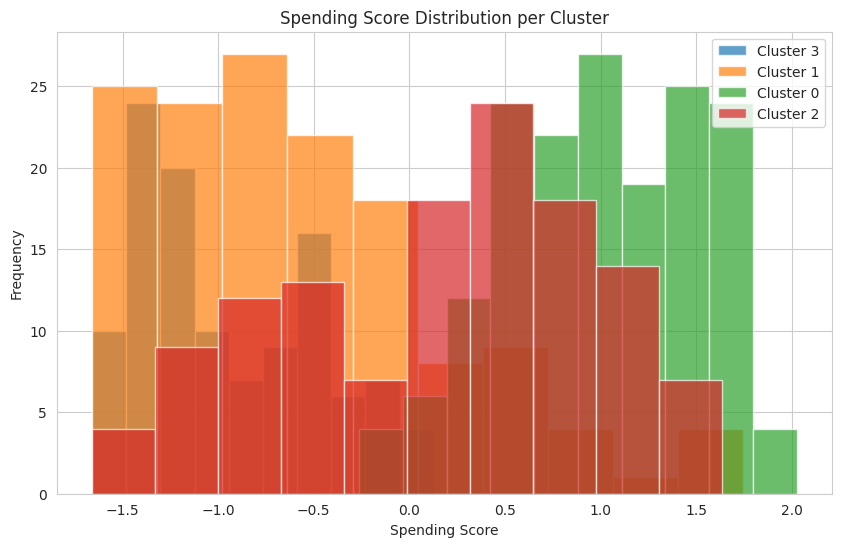

In [62]:
# prompt: visualise clustering with their spending score in histgram

import matplotlib.pyplot as plt

# Assuming 'df' and 'df_pca' are defined from the previous code and 'df' contains 'Cluster_k' and 'Spending_Score'

plt.figure(figsize=(10, 6))

for cluster_label in df['Cluster_k'].unique():
    cluster_data = df[df['Cluster_k'] == cluster_label]
    plt.hist(cluster_data['Spending_Score'], alpha=0.7, label=f'Cluster {cluster_label}')

plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.title('Spending Score Distribution per Cluster')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-63-7c27664e3f5e>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(df['Cluster_k'].unique()))  # Get a colormap with enough colors


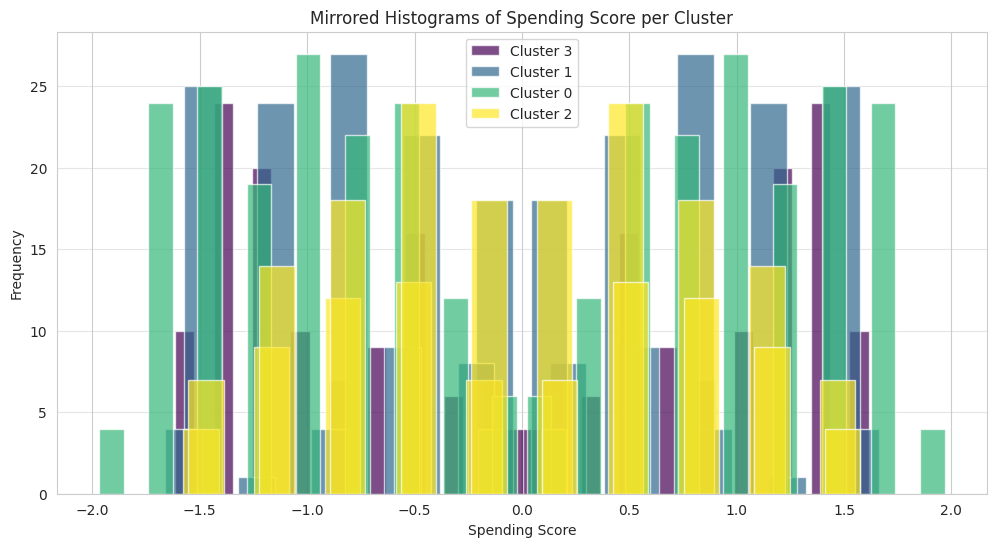

In [63]:
plt.figure(figsize=(12, 6))

colors = plt.cm.get_cmap('viridis', len(df['Cluster_k'].unique()))  # Get a colormap with enough colors

for i, cluster_label in enumerate(df['Cluster_k'].unique()):
    cluster_data = df[df['Cluster_k'] == cluster_label]

    # Calculate histogram data for the current cluster
    hist_values, bin_edges = np.histogram(cluster_data['Spending_Score'], bins=10)  # Adjust bins as needed

    # Plotting mirrored histograms
    bar_width = (bin_edges[1] - bin_edges[0]) / 2  # Adjust bar width if necessary

    # Get color for the current cluster
    color = colors(i)

    # Plot for the first side of the axis
    plt.bar(bin_edges[:-1] + bar_width, hist_values, width=bar_width, label=f'Cluster {cluster_label}', alpha=0.7, color=color)

    # Plot for the second side of the axis using the same color
    plt.bar(-bin_edges[:-1] - bar_width, hist_values, width=bar_width, alpha=0.7, color=color)


plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.title('Mirrored Histograms of Spending Score per Cluster')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

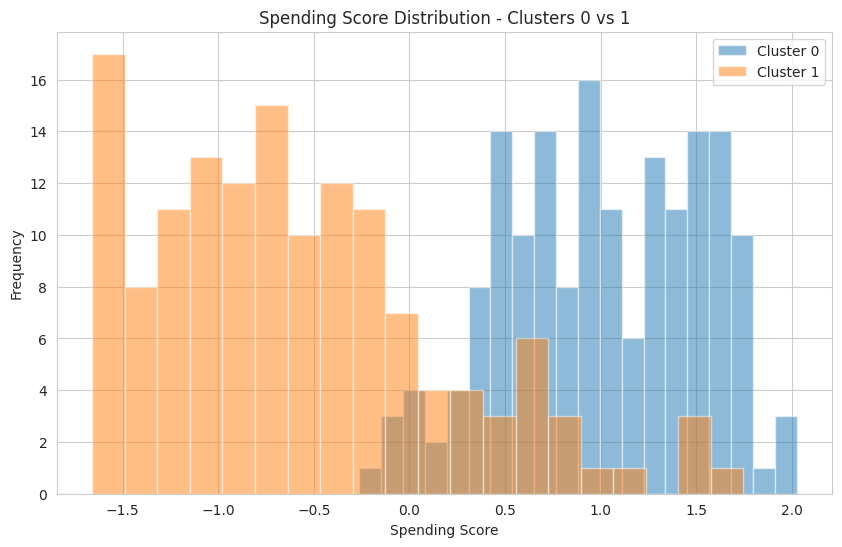

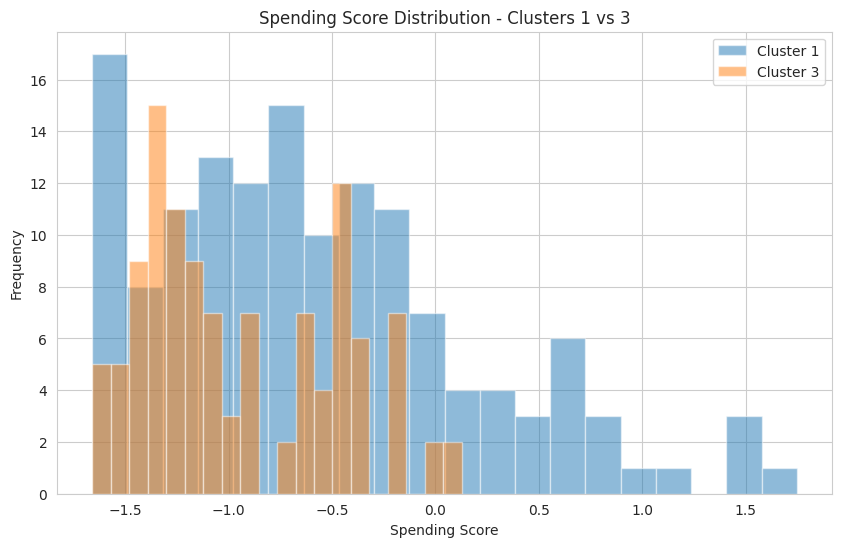

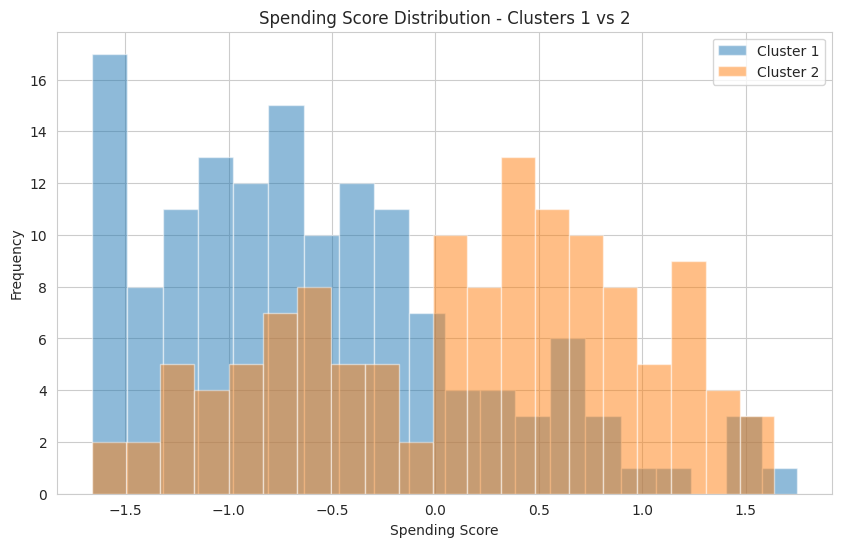

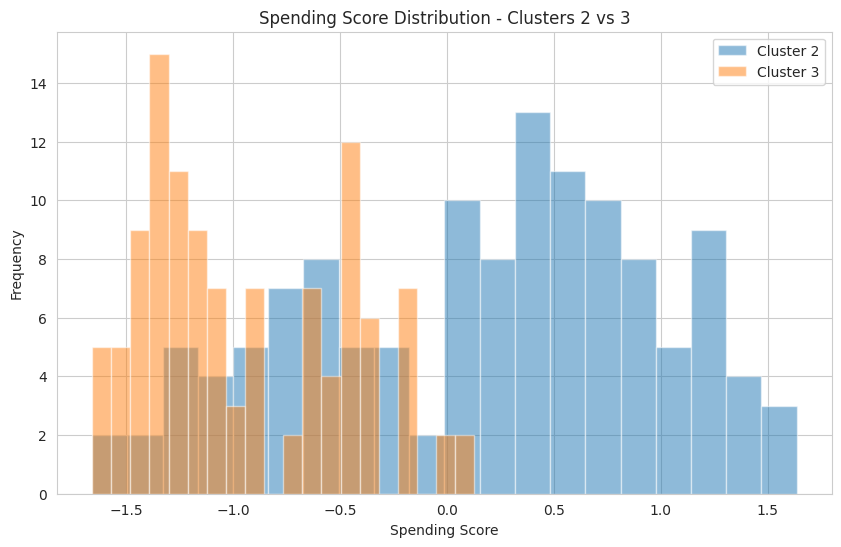

In [64]:
# prompt: visualise clusters with their spending score with histogram with butterfly for comparing  with two clusters one time

import matplotlib.pyplot as plt

# Assuming 'df' and 'df_pca' are defined from the previous code and contain 'Cluster_k' and 'Spending_Score' columns.

def visualize_clusters(cluster1, cluster2):
    plt.figure(figsize=(10, 6))

    for cluster_label in [cluster1, cluster2]:
        cluster_data = df[df['Cluster_k'] == cluster_label]
        plt.hist(cluster_data['Spending_Score'], alpha=0.5, label=f'Cluster {cluster_label}', bins=20)

    plt.xlabel('Spending Score')
    plt.ylabel('Frequency')
    plt.title(f'Spending Score Distribution - Clusters {cluster1} vs {cluster2}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage: Compare clusters 0 and 1
visualize_clusters(0, 1)

# Example usage: Compare clusters 1 and 3
visualize_clusters(1,3)

# Example usage: Compare clusters 1 and 2
visualize_clusters(1,2)

# Example usage: Compare clusters 2 and 3
visualize_clusters(2,3)


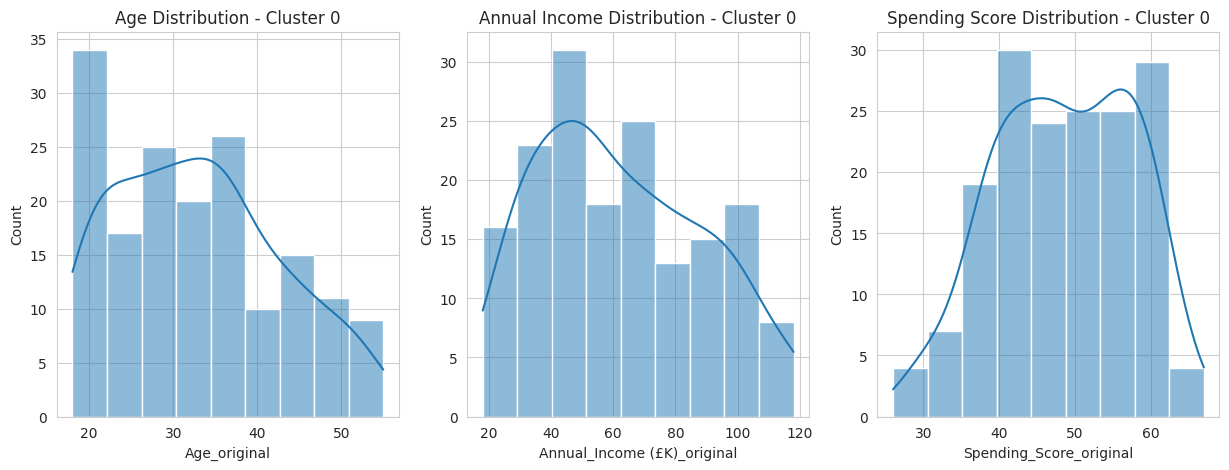

Cluster 0 Statistics:
       Age_original  Annual_Income (£K)_original  Spending_Score_original
count    167.000000                   167.000000               167.000000
mean      32.954491                    62.379641                48.609581
std        9.760029                    26.627385                 9.056232
min       18.000000                    18.000000                26.000000
25%       25.000000                    42.000000                41.000000
50%       33.000000                    57.000000                48.000000
75%       39.100000                    82.000000                56.500000
max       55.000000                   118.000000                67.000000
--------------------


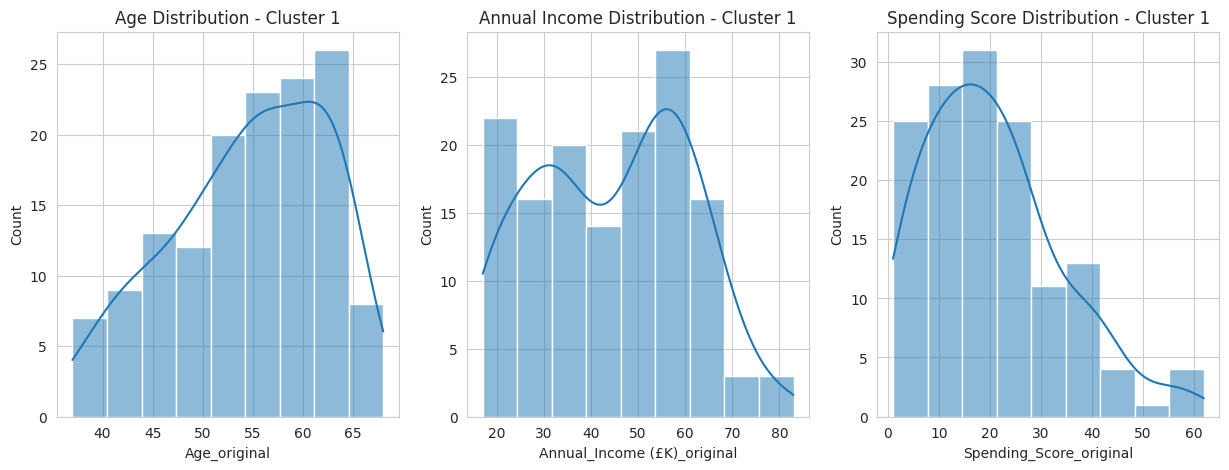

Cluster 1 Statistics:
       Age_original  Annual_Income (£K)_original  Spending_Score_original
count    142.000000                   142.000000               142.000000
mean      54.560563                    44.460563                20.491549
std        7.751101                    16.515902                13.399092
min       37.000000                    17.000000                 1.000000
25%       49.000000                    31.000000                10.250000
50%       55.500000                    46.000000                18.500000
75%       61.000000                    58.000000                28.000000
max       68.000000                    83.000000                62.000000
--------------------


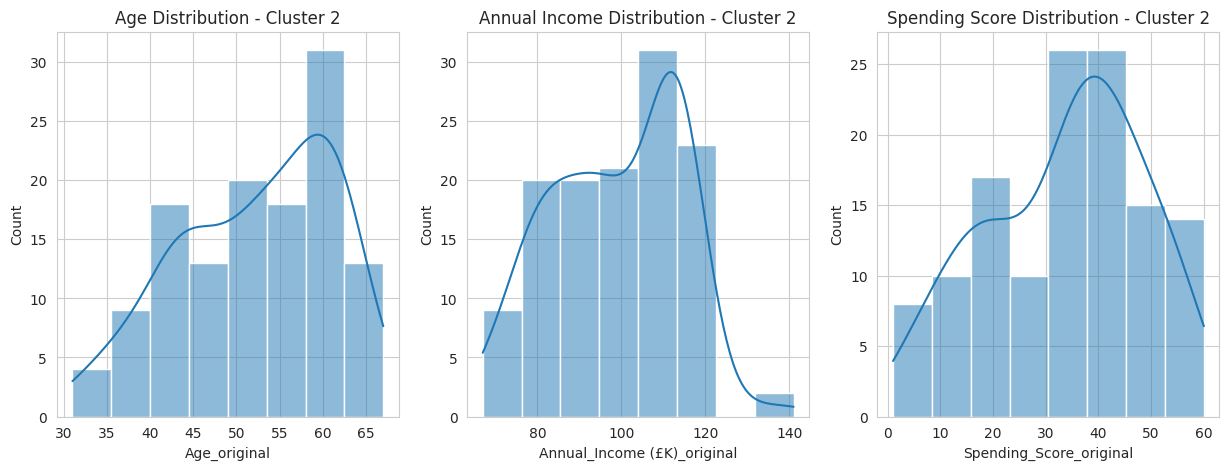

Cluster 2 Statistics:
       Age_original  Annual_Income (£K)_original  Spending_Score_original
count    126.000000                   126.000000               126.000000
mean      52.187302                    98.865079                33.607937
std        8.970092                    15.474548                14.811853
min       31.000000                    67.000000                 1.000000
25%       45.000000                    86.000000                21.000000
50%       53.000000                    99.500000                36.500000
75%       60.000000                   112.000000                45.000000
max       67.000000                   141.000000                60.000000
--------------------


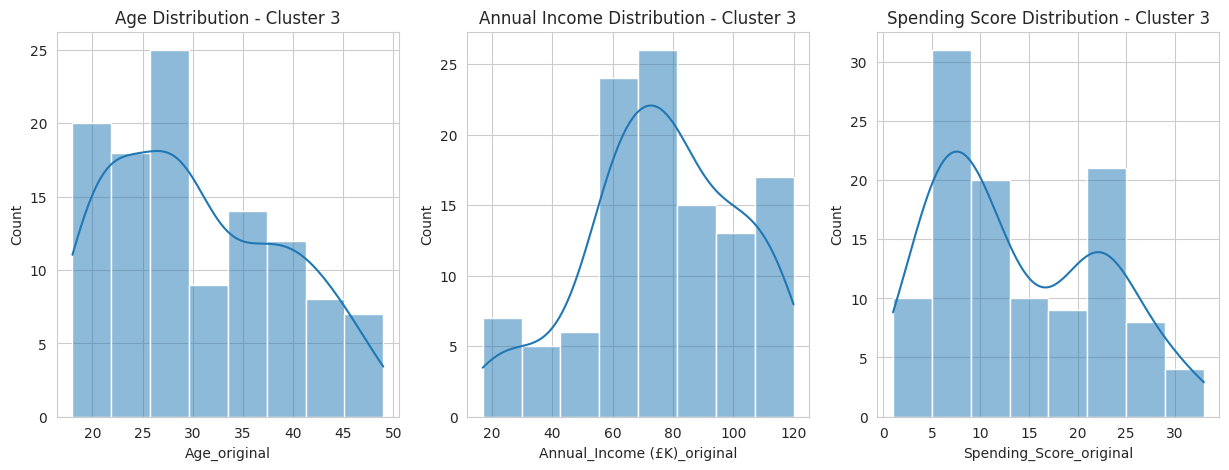

Cluster 3 Statistics:
       Age_original  Annual_Income (£K)_original  Spending_Score_original
count    113.000000                   113.000000               113.000000
mean      30.368142                    76.587611                13.877876
std        8.532315                    25.326331                 8.479363
min       18.000000                    17.000000                 1.000000
25%       23.000000                    61.000000                 7.000000
50%       29.000000                    77.000000                11.000000
75%       37.000000                    98.000000                22.000000
max       49.000000                   120.000000                33.000000
--------------------


In [65]:
# prompt: analysis for each cluster plot with Age_original,Annual_Income (£K)_original, Spending_Score_original

# Assuming 'df' is your DataFrame with 'Cluster_k', 'Age_original', 'Annual_Income (£K)_original', and 'Spending_Score_original' columns.

import matplotlib.pyplot as plt
import seaborn as sns

# Group data by cluster
grouped = df.groupby('Cluster_k')

# Iterate through each cluster and create analysis plots
for cluster_label, cluster_data in grouped:
    plt.figure(figsize=(15, 5))  # Adjust figure size as needed

    # Plot Age distribution
    plt.subplot(1, 3, 1)
    sns.histplot(cluster_data['Age_original'], kde=True)
    plt.title(f'Age Distribution - Cluster {cluster_label}')

    # Plot Annual Income distribution
    plt.subplot(1, 3, 2)
    sns.histplot(cluster_data['Annual_Income (£K)_original'], kde=True)
    plt.title(f'Annual Income Distribution - Cluster {cluster_label}')

    # Plot Spending Score distribution
    plt.subplot(1, 3, 3)
    sns.histplot(cluster_data['Spending_Score_original'], kde=True)
    plt.title(f'Spending Score Distribution - Cluster {cluster_label}')

    plt.show() # Show the plot for the current cluster

    # Additional analysis (example: descriptive statistics)
    print(f"Cluster {cluster_label} Statistics:")
    print(cluster_data[['Age_original', 'Annual_Income (£K)_original', 'Spending_Score_original']].describe())
    print("-" * 20)

In [66]:

# Group data by cluster
grouped = df.groupby('Cluster_k')

# Define colors for each cluster (you can add more if you have more clusters)
cluster_colors = ['blue', 'orange', 'green', 'red']

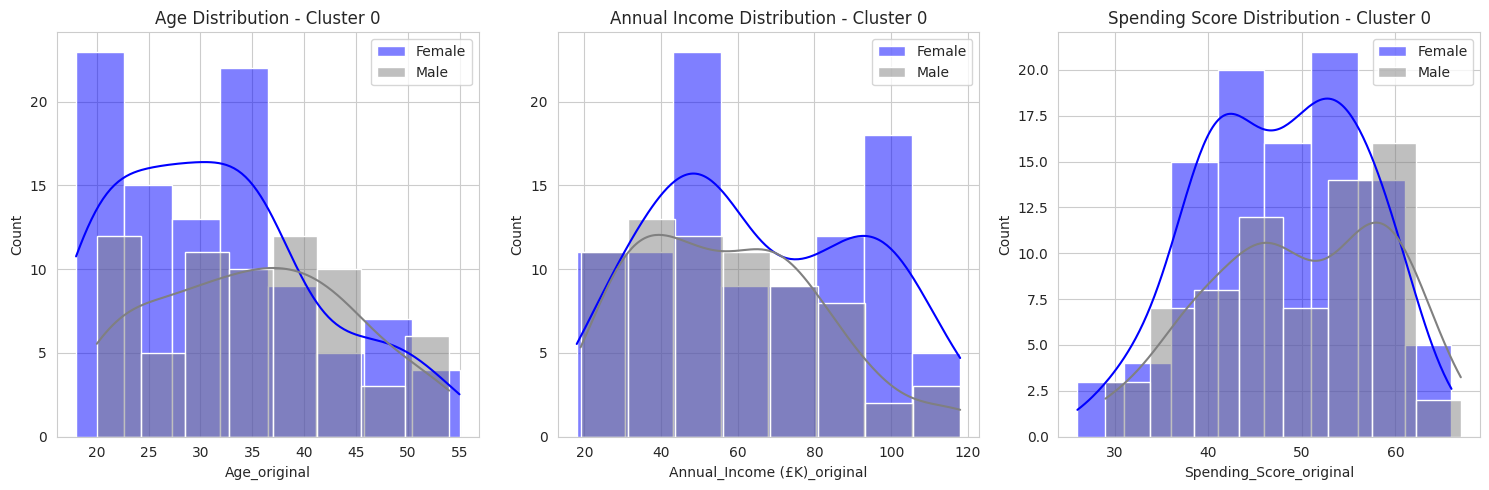

Cluster 0 Statistics:
       Age_original  Annual_Income (£K)_original  Spending_Score_original
count    167.000000                   167.000000               167.000000
mean      32.954491                    62.379641                48.609581
std        9.760029                    26.627385                 9.056232
min       18.000000                    18.000000                26.000000
25%       25.000000                    42.000000                41.000000
50%       33.000000                    57.000000                48.000000
75%       39.100000                    82.000000                56.500000
max       55.000000                   118.000000                67.000000
--------------------


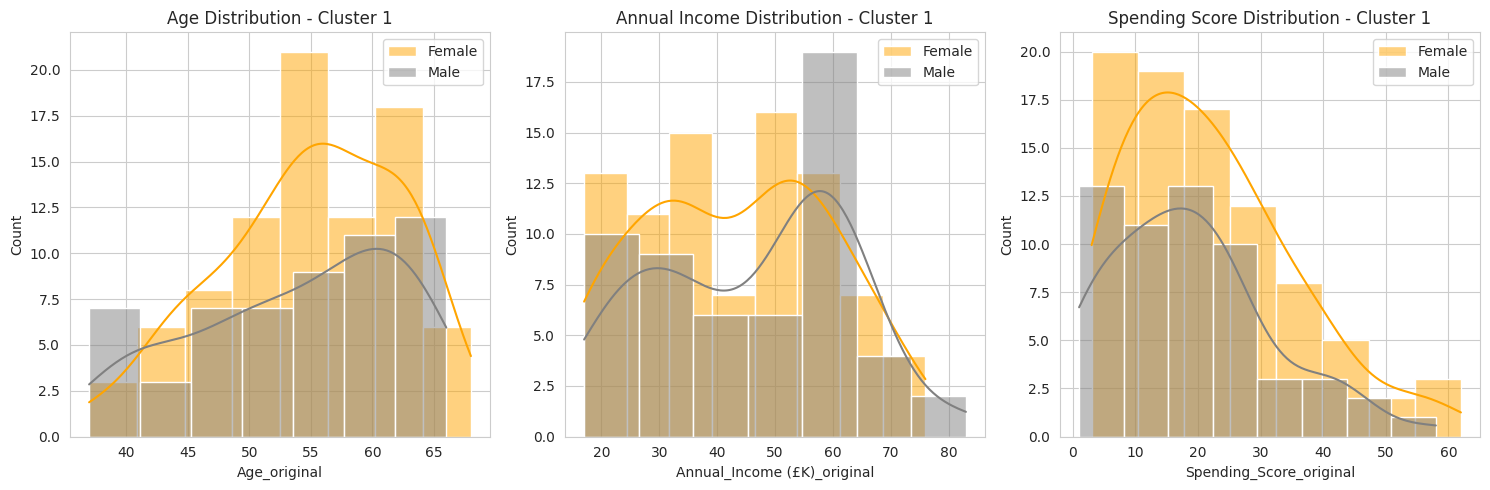

Cluster 1 Statistics:
       Age_original  Annual_Income (£K)_original  Spending_Score_original
count    142.000000                   142.000000               142.000000
mean      54.560563                    44.460563                20.491549
std        7.751101                    16.515902                13.399092
min       37.000000                    17.000000                 1.000000
25%       49.000000                    31.000000                10.250000
50%       55.500000                    46.000000                18.500000
75%       61.000000                    58.000000                28.000000
max       68.000000                    83.000000                62.000000
--------------------


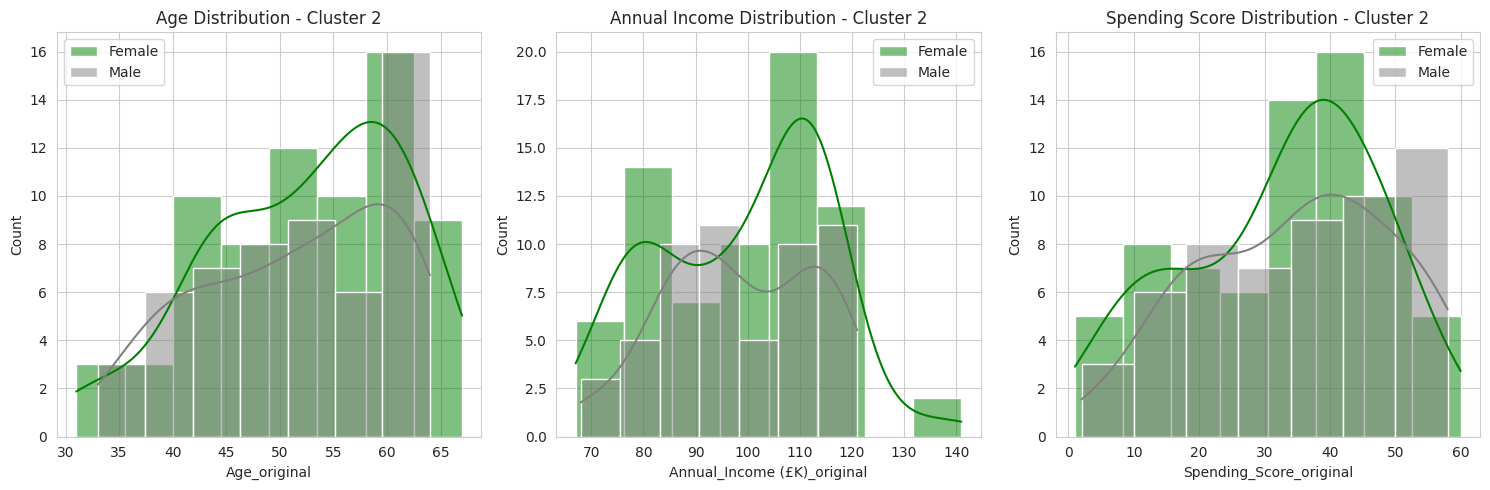

Cluster 2 Statistics:
       Age_original  Annual_Income (£K)_original  Spending_Score_original
count    126.000000                   126.000000               126.000000
mean      52.187302                    98.865079                33.607937
std        8.970092                    15.474548                14.811853
min       31.000000                    67.000000                 1.000000
25%       45.000000                    86.000000                21.000000
50%       53.000000                    99.500000                36.500000
75%       60.000000                   112.000000                45.000000
max       67.000000                   141.000000                60.000000
--------------------


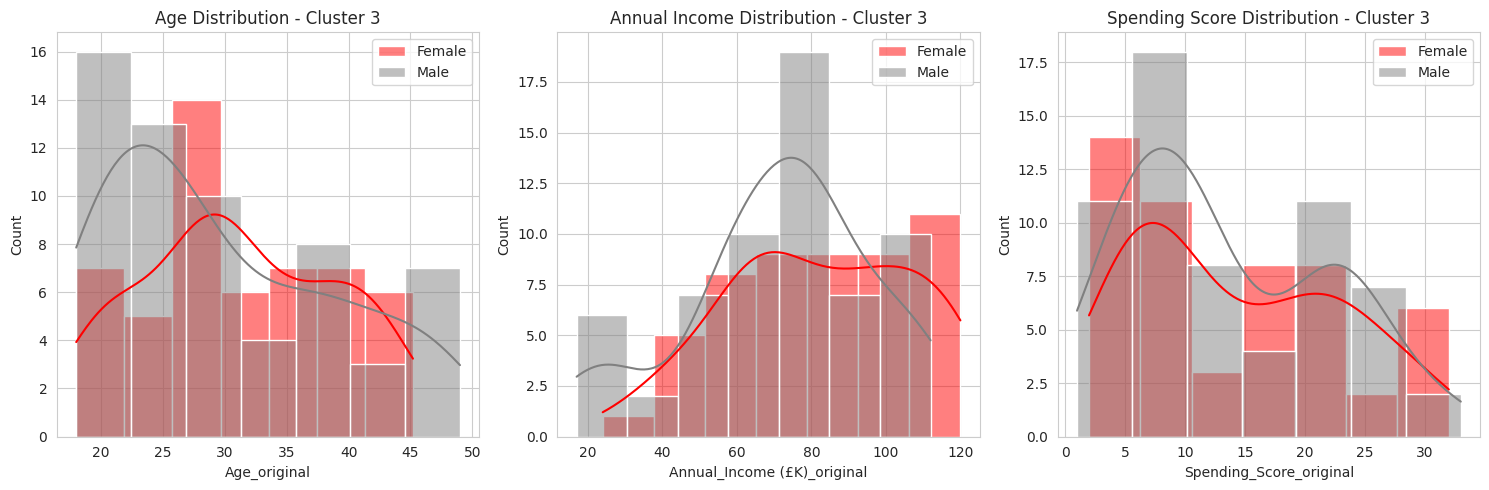

Cluster 3 Statistics:
       Age_original  Annual_Income (£K)_original  Spending_Score_original
count    113.000000                   113.000000               113.000000
mean      30.368142                    76.587611                13.877876
std        8.532315                    25.326331                 8.479363
min       18.000000                    17.000000                 1.000000
25%       23.000000                    61.000000                 7.000000
50%       29.000000                    77.000000                11.000000
75%       37.000000                    98.000000                22.000000
max       49.000000                   120.000000                33.000000
--------------------


In [67]:
 # Iterate through each cluster and create analysis plots
for cluster_label, cluster_data in grouped:
    plt.figure(figsize=(15, 5))  # Adjust figure size as needed

    # Get the color for the current cluster
    color = cluster_colors[cluster_label]

    # Plot Age distribution, divided by Gender_Male
    plt.subplot(1, 3, 1)
    sns.histplot(cluster_data[cluster_data['Gender_Male'] == 0]['Age_original'],
                 kde=True, color=color, label='Female')
    sns.histplot(cluster_data[cluster_data['Gender_Male'] == 1]['Age_original'],
                 kde=True, color='gray', label='Male')
    plt.title(f'Age Distribution - Cluster {cluster_label}')
    plt.legend()  # Add legend to distinguish genders

    # Plot Annual Income distribution, divided by Gender_Male
    plt.subplot(1, 3, 2)
    sns.histplot(cluster_data[cluster_data['Gender_Male'] == 0]['Annual_Income (£K)_original'],
                 kde=True, color=color, label='Female')
    sns.histplot(cluster_data[cluster_data['Gender_Male'] == 1]['Annual_Income (£K)_original'],
                 kde=True, color='gray', label='Male')
    plt.title(f'Annual Income Distribution - Cluster {cluster_label}')
    plt.legend()

    # Plot Spending Score distribution, divided by Gender_Male
    plt.subplot(1, 3, 3)
    sns.histplot(cluster_data[cluster_data['Gender_Male'] == 0]['Spending_Score_original'],
                 kde=True, color=color, label='Female')
    sns.histplot(cluster_data[cluster_data['Gender_Male'] == 1]['Spending_Score_original'],
                 kde=True, color='gray', label='Male')
    plt.title(f'Spending Score Distribution - Cluster {cluster_label}')
    plt.legend()

    plt.tight_layout() # Adjust layout to prevent overlapping
    plt.show() # Show the plot for the current cluster

    # Additional analysis (example: descriptive statistics)
    print(f"Cluster {cluster_label} Statistics:")
    print(cluster_data[['Age_original', 'Annual_Income (£K)_original', 'Spending_Score_original']].describe())
    print("-" * 20)

In [75]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


In [76]:

import streamlit as st
import plotly.express as px

# Iterate directly over the grouped object
for cluster_label, cluster_data in grouped:
    st.subheader(f"Cluster {cluster_label} Analysis")

    # Age Distribution
    fig1 = px.histogram(cluster_data, x="Age_original", color="Gender_Male",
                        title=f'Age Distribution - Cluster {cluster_label}',
                        barmode="overlay", color_discrete_map={0: cluster_colors[cluster_label], 1: "gray"})
    st.plotly_chart(fig1)

    # Annual Income Distribution
    fig2 = px.histogram(cluster_data, x="Annual_Income (£K)_original", color="Gender_Male",
                        title=f'Annual Income - Cluster {cluster_label}',
                        barmode="overlay", color_discrete_map={0: cluster_colors[cluster_label], 1: "gray"})
    st.plotly_chart(fig2)

    # Spending Score Distribution
    fig3 = px.histogram(cluster_data, x="Spending_Score_original", color="Gender_Male",
                        title=f'Spending Score - Cluster {cluster_label}',
                        barmode="overlay", color_discrete_map={0: cluster_colors[cluster_label], 1: "gray"})
    st.plotly_chart(fig3)

    # Show statistics
    st.write(f"**Cluster {cluster_label} Statistics:**")
    st.dataframe(cluster_data.describe())

2025-03-28 11:16:24.697 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 11:16:24.933 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-28 11:16:24.941 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 11:16:26.543 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 11:16:26.546 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 11:16:26.548 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 11:16:26.551 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 11:16:26.629 Thread 'MainThread': mi

In [68]:
# Group data by cluster and sort by mean Spending_Score in descending order
cluster_spending = df.groupby('Cluster_k')['Spending_Score_original'].mean().sort_values(ascending=False)

# Print the cluster rankings
print("Cluster Ranking by Mean Spending Score:")
for cluster, mean_spending in cluster_spending.items():
    print(f"Cluster {cluster}: {mean_spending:.2f}")

# Further analysis to show age distribution within each cluster
for cluster_label in cluster_spending.index:
    cluster_data = df[df['Cluster_k'] == cluster_label]
    print(f"\nAge Distribution for Cluster {cluster_label}:")
    print(cluster_data['Age_original'].describe())


Cluster Ranking by Mean Spending Score:
Cluster 0: 48.61
Cluster 2: 33.61
Cluster 1: 20.49
Cluster 3: 13.88

Age Distribution for Cluster 0:
count    167.000000
mean      32.954491
std        9.760029
min       18.000000
25%       25.000000
50%       33.000000
75%       39.100000
max       55.000000
Name: Age_original, dtype: float64

Age Distribution for Cluster 2:
count    126.000000
mean      52.187302
std        8.970092
min       31.000000
25%       45.000000
50%       53.000000
75%       60.000000
max       67.000000
Name: Age_original, dtype: float64

Age Distribution for Cluster 1:
count    142.000000
mean      54.560563
std        7.751101
min       37.000000
25%       49.000000
50%       55.500000
75%       61.000000
max       68.000000
Name: Age_original, dtype: float64

Age Distribution for Cluster 3:
count    113.000000
mean      30.368142
std        8.532315
min       18.000000
25%       23.000000
50%       29.000000
75%       37.000000
max       49.000000
Name: Age_origi

In [69]:
# Group data by cluster and calculate the mean of 'Annual_Income (£K)_original', 'Age_original', and 'Spending_Score_original' for each cluster
cluster_means = df.groupby('Cluster_k')[['Annual_Income (£K)_original', 'Age_original', 'Spending_Score_original']].mean()

# Find the cluster with the highest mean income, age, and spending score
highest_income_cluster = cluster_means['Annual_Income (£K)_original'].idxmax()
highest_age_cluster = cluster_means['Age_original'].idxmax()
highest_spending_cluster = cluster_means['Spending_Score_original'].idxmax()

print(f"Cluster with highest income: {highest_income_cluster}")
print(f"Cluster with highest age: {highest_age_cluster}")
print(f"Cluster with highest spending score: {highest_spending_cluster}")




Cluster with highest income: 2
Cluster with highest age: 1
Cluster with highest spending score: 0


In [70]:
# Group data by cluster and calculate the mean of relevant columns
cluster_means = df.groupby('Cluster_k')[['Annual_Income (£K)_original', 'Age_original', 'Spending_Score_original']].mean()

# Print the mean values for each cluster
print("Mean values for each cluster:")
print(cluster_means)

# Find the cluster with the highest mean income, age, and spending score
highest_income_cluster = cluster_means['Annual_Income (£K)_original'].idxmax()
highest_age_cluster = cluster_means['Age_original'].idxmax()
highest_spending_cluster = cluster_means['Spending_Score_original'].idxmax()

print(f"\nCluster with highest income: {highest_income_cluster}")
print(f"Cluster with highest age: {highest_age_cluster}")
print(f"Cluster with highest spending score: {highest_spending_cluster}")


Mean values for each cluster:
           Annual_Income (£K)_original  Age_original  Spending_Score_original
Cluster_k                                                                    
0                            62.379641     32.954491                48.609581
1                            44.460563     54.560563                20.491549
2                            98.865079     52.187302                33.607937
3                            76.587611     30.368142                13.877876

Cluster with highest income: 2
Cluster with highest age: 1
Cluster with highest spending score: 0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          548 non-null    float64
 1   Annual_Income (£K)           548 non-null    float64
 2   Spending_Score               548 non-null    float64
 3   Gender_Female                548 non-null    bool   
 4   Gender_Male                  548 non-null    bool   
 5   Cluster_k                    548 non-null    int32  
 6   Age_original                 548 non-null    float64
 7   Annual_Income (£K)_original  548 non-null    float64
 8   Spending_Score_original      548 non-null    float64
dtypes: bool(2), float64(6), int32(1)
memory usage: 29.0 KB
